# The Battle of Neighborhoods

This is the final peer review assignment in Applied data science capstone course.

### 1. Create a data frame of Helsinki neighborhoods

Import the needed libraries.

In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd

Load the page containing Helsinki borough names. Then use BeautifulSoup library to do web scraping and wrangle the data so that you can read the borough names into a data frame.

In [2]:
# load the wikipage of Helsinki subdivisions
page=requests.get("https://en.wikipedia.org/wiki/Subdivisions_of_Helsinki")
soup=BeautifulSoup(page.content,'html.parser')

In [3]:
# Find the borough names within hmtl code
wikidata=soup.find('div', class_='div-col columns column-width') 
tag_elements=wikidata.find_all('li')

In [4]:
# Read the borough IDs and names to a data frame
# Include only the Finnish name, i.e leave Swedish name out for the boroughs
df_hki=pd.DataFrame(columns=['Borough ID','Borough'])
n=int(len(tag_elements))
for i in range(n):
    borough_temp=tag_elements[i].get_text().split()
    df_hki.loc[i,'Borough ID']=borough_temp[0]
    df_hki.loc[i,'Borough']=borough_temp[1]

In [5]:
#Leave out the outer sea , i.e. the last one in the list which is unnumbered and also 'Ulkosaaret' which is also sea area.
df_hki=df_hki[df_hki['Borough ID']!='(unnumbered)']
df_hki=df_hki[df_hki['Borough']!='Ulkosaaret']

In [6]:
#Convert Borough ID's to integers
df_hki['Borough ID']=df_hki['Borough ID'].astype("int")

In [7]:
# Leave out the sub-boroughs (IDs that are >100).
df_hki=df_hki[df_hki['Borough ID']<100].reset_index(drop=True)
df_hki

,Borough ID,Borough
0,1,Kruununhaka
1,2,Kluuvi
2,3,Kaartinkaupunki
3,4,Kamppi
4,5,Punavuori
5,6,Eira
6,7,Ullanlinna
7,8,Katajanokka
8,9,Kaivopuisto
9,10,Sörnäinen


### 2. Add the coordinates to the boroughs

The coordinates of Helsinki boroughs can be found from this page: https://latitude.to 
They were collected from there into a csv file: Helsinki_Boroughs_coordinates.csv.

Read in the csv file containing the latitude and longitude values for the Helsinki boroughs.

In [8]:
df_geo=pd.read_excel("Helsinki_Boroughs_coordinates.xlsx")
df_geo.head()

,Borough ID,Borough,Latitude,Longitude
0,1,Kruununhaka,60.169999,24.953830
1,2,Kluuvi,60.172480,24.940640
2,3,Kaartinkaupunki,60.165200,24.948970
3,4,Kamppi,60.167460,24.931070
4,5,Punavuori,60.156999,24.936163


Join the earlier created data frame containing boroughs, and this new data frame containing location coordinates. 
The join is made based on the Borough ID column data.

In [9]:
df_hki=pd.merge(df_hki,df_geo)
df_hki.head()

,Borough ID,Borough,Latitude,Longitude
0,1,Kruununhaka,60.169999,24.953830
1,2,Kluuvi,60.172480,24.940640
2,3,Kaartinkaupunki,60.165200,24.948970
3,4,Kamppi,60.167460,24.931070
4,5,Punavuori,60.156999,24.936163


In [10]:
#Drop the Borough ID column
df_hki.drop('Borough ID',axis=1,inplace=True)
df_hki.head()

,Borough,Latitude,Longitude
0,Kruununhaka,60.169999,24.953830
1,Kluuvi,60.172480,24.940640
2,Kaartinkaupunki,60.165200,24.948970
3,Kamppi,60.167460,24.931070
4,Punavuori,60.156999,24.936163


### 3. Visualize the Helsinki neighborhoods on the map

Import the needed libraries

In [11]:
import folium
from geopy.geocoders import Nominatim

Use geopy library to get the latitude and longitude values of Helsinki.

In [12]:
address='Helsinki,FI'
geolocator=Nominatim()
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geographical coordinates of Helsinki are {}, {}. '.format(latitude,longitude))

The geographical coordinates of Helsinki are 60.1713198, 24.9414566. 


Visualise Helsinki and the neighborhoods in it.

In [13]:
# create map of Helsinki using latitude and longitude values
map_helsinki = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_hki['Latitude'], df_hki['Longitude'], df_hki['Borough']):     
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_helsinki)  
    
map_helsinki

### 4. Explore the neighborhoods in Helsinki

Utilize Foursquare API to explore the neighborhoods and segment them.

#This part of the code is removed since foursquare api credentials are secret.

Copy the getNearbyVenues function from New York lab.

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a new data frame called helsinki_venues, utilizing getNearbyVenues function. 
This will get at max 100 venues within a radius of 500 meters for each neighborhood in Helsinki.

In [16]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
helsinki_venues = getNearbyVenues(names=df_hki['Borough'],
                                   latitudes=df_hki['Latitude'],
                                   longitudes=df_hki['Longitude']
                                  )

Kruununhaka
Kluuvi
Kaartinkaupunki
Kamppi
Punavuori
Eira
Ullanlinna
Katajanokka
Kaivopuisto
Sörnäinen
Kallio
Alppiharju
Etu-Töölö
Taka-Töölö
Meilahti
Ruskeasuo
Pasila
Laakso
Mustikkamaa-Korkeasaari
Länsisatama
Hermanni
Vallila
Toukola
Kumpula
Käpylä
Koskela
Vanhakaupunki
Oulunkylä
Haaga
Munkkiniemi
Lauttasaari
Konala
Kaarela
Pakila
Tuomarinkylä
Viikki
Pukinmäki
Malmi
Tapaninkylä
Suutarila
Suurmetsä
Kulosaari
Herttoniemi
Tammisalo
Vartiokylä
Pitäjänmäki
Mellunkylä
Vartiosaari
Laajasalo
Villinki
Santahamina
Suomenlinna
Vuosaari
Östersundom
Salmenkallio
Talosaari
Karhusaari
Ultuna


Let's check the size of the resulting data frame.

In [17]:
print(helsinki_venues.shape)
helsinki_venues.head()

(1259, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kruununhaka,60.169999,24.95383,Trillby & Chadwick,60.168398,24.953651,Speakeasy
1,Kruununhaka,60.169999,24.95383,Senaatintori,60.169377,24.952033,Plaza
2,Kruununhaka,60.169999,24.95383,Tuomiokirkon portaat,60.169909,24.951915,Scenic Lookout
3,Kruununhaka,60.169999,24.95383,El Fant,60.168680,24.953713,Café
4,Kruununhaka,60.169999,24.95383,Helsingin kaupunginmuseo / Helsinki City Museu...,60.168996,24.954028,History Museum


Let's check how many venues were returned for each neighborhood.

In [18]:
helsinki_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alppiharju,24,24,24,24,24,24
Eira,29,29,29,29,29,29
Etu-Töölö,27,27,27,27,27,27
Haaga,18,18,18,18,18,18
Hermanni,22,22,22,22,22,22
Herttoniemi,40,40,40,40,40,40
Kaarela,4,4,4,4,4,4
Kaartinkaupunki,100,100,100,100,100,100
Kaivopuisto,12,12,12,12,12,12


Let's create a chart showing how many venues were found for each neighborhood.

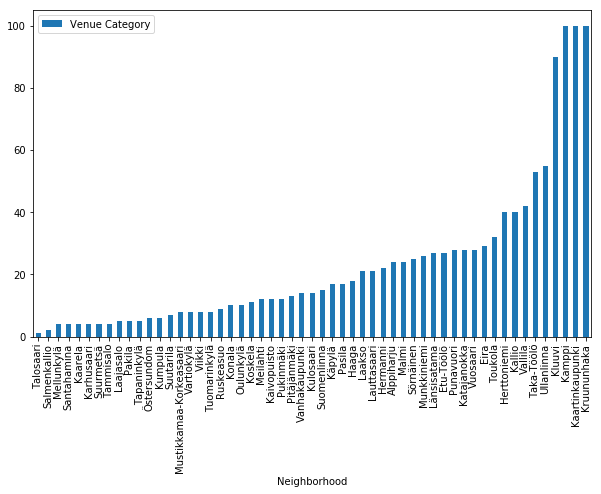

In [29]:
import matplotlib.pyplot as plt                        
df_graph=helsinki_venues.groupby('Neighborhood').count()[['Venue Category']]
df_graph.sort_values(by='Venue Category',ascending=True,axis=0,inplace=True)
df_graph.plot(kind='bar', figsize=(10, 6)) 
plt.show()

Let's check also how many unique categories there are in all the results.

In [30]:
print('There are {} uniques categories.'.format(len(helsinki_venues['Venue Category'].unique())))

There are 243 uniques categories.


Create a new data frame where each category is in own column, transformed by one hot encoding.

In [31]:
# one hot encoding
helsinki_onehot = pd.get_dummies(helsinki_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
helsinki_onehot['Neighborhood'] = helsinki_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [helsinki_onehot.columns[-1]] + list(helsinki_onehot.columns[:-1])
helsinki_onehot = helsinki_onehot[fixed_columns]
helsinki_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo
0,Kruununhaka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kruununhaka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kruununhaka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kruununhaka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kruununhaka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Let's check the shape of dataframe
helsinki_onehot.shape

(1259, 244)

Next, group rows by neighborhoods and take the mean of frequency of occurrence of each category.

In [33]:
helsinki_grouped = helsinki_onehot.groupby('Neighborhood').mean().reset_index()
helsinki_grouped.head()

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo
0,Alppiharju,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.041667,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,Eira,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.034483,0.034483,0.0,0.0,0.000000,0.0
2,Etu-Töölö,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.037037,0.0
3,Haaga,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.055556,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,Hermanni,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.045455,0.045455,0.000000,0.000000,0.0,0.0,0.045455,0.0


In [34]:
#Let's check the shape of dataframe
helsinki_grouped.shape

(55, 244)

Copy the function return_most_common_venues() from New York lab.This sorts the venues in descending order in the next step.

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)   
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create a new dataframe and display the top 10 venues for each neighborhood.

In [36]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = helsinki_grouped['Neighborhood']

for ind in np.arange(helsinki_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(helsinki_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alppiharju,Theme Park Ride / Attraction,Dog Run,Park,Sushi Restaurant,Dance Studio,Bar,Pub,Event Space,Gym,Blini House
1,Eira,Scandinavian Restaurant,Park,Boat or Ferry,Playground,Café,Bakery,Bistro,Coffee Shop,Beach,Pizza Place
2,Etu-Töölö,Café,Scandinavian Restaurant,Pub,Park,Theater,Bay,Gym / Fitness Center,Supermarket,Bistro,Tennis Court
3,Haaga,Bus Stop,Garden,Pizza Place,Grocery Store,Bakery,Cafeteria,Asian Restaurant,Café,Platform,Indian Restaurant
4,Hermanni,Bus Stop,Pizza Place,Bar,Tram Station,Playground,Flea Market,Restaurant,Recycling Facility,Convenience Store,Sauna / Steam Room
5,Herttoniemi,Bus Stop,Gym / Fitness Center,Chinese Restaurant,Supermarket,Accessories Store,Grocery Store,Sushi Restaurant,Metro Station,Gastropub,Garden Center
6,Kaarela,Movie Theater,Garden,Bus Stop,Playground,Film Studio,Furniture / Home Store,French Restaurant,Fountain,Food Truck,Food Court
7,Kaartinkaupunki,Scandinavian Restaurant,Café,Hotel,Restaurant,Coffee Shop,Bar,Furniture / Home Store,Park,Mediterranean Restaurant,Dance Studio
8,Kaivopuisto,Coffee Shop,Park,Pier,History Museum,Scandinavian Restaurant,Recreation Center,Ice Cream Shop,Nightclub,Restaurant,Grocery Store
9,Kallio,Theme Park Ride / Attraction,Bar,Theater,Vegetarian / Vegan Restaurant,Thai Restaurant,Tram Station,Event Space,Café,Park,Japanese Restaurant


### 5. Cluster the neighborhoods in Helsinki

Next, cluster the neighborhoods. This is done with k-means clustering, by clustering the neighborhoods into 5 clusters.

In [37]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5
helsinki_grouped_clustering = helsinki_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(helsinki_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 3, 3, 3, 3, 0, 0, 0], dtype=int32)

In [38]:
kmeans.labels_

array([0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0,
       3, 0, 0, 0, 3, 0, 0, 3, 1, 3, 3, 3, 0, 0, 1, 0, 0, 4, 0, 0, 0, 2,
       0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [39]:
df_hki.rename(columns={'Borough':'Neighborhood'},inplace=True)
# merge df_hki with neighborhoods_venues data to add latitude/longitude for each neighborhood
helsinki_merged=pd.merge(neighborhoods_venues_sorted, df_hki,how='left',on='Neighborhood')
# add clustering labels
helsinki_merged['Cluster Labels'] = kmeans.labels_
helsinki_merged.head() 

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,Cluster Labels
0,Alppiharju,Theme Park Ride / Attraction,Dog Run,Park,Sushi Restaurant,Dance Studio,Bar,Pub,Event Space,Gym,Blini House,60.19187,24.94261,0
1,Eira,Scandinavian Restaurant,Park,Boat or Ferry,Playground,Café,Bakery,Bistro,Coffee Shop,Beach,Pizza Place,60.15517,24.93819,0
2,Etu-Töölö,Café,Scandinavian Restaurant,Pub,Park,Theater,Bay,Gym / Fitness Center,Supermarket,Bistro,Tennis Court,60.17382,24.91853,0
3,Haaga,Bus Stop,Garden,Pizza Place,Grocery Store,Bakery,Cafeteria,Asian Restaurant,Café,Platform,Indian Restaurant,60.22186,24.89619,3
4,Hermanni,Bus Stop,Pizza Place,Bar,Tram Station,Playground,Flea Market,Restaurant,Recycling Facility,Convenience Store,Sauna / Steam Room,60.19510,24.96678,3


In [40]:
helsinki_merged.shape

(55, 14)

Let's visualize the resulting clusters.

In [41]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(helsinki_merged['Latitude'], helsinki_merged['Longitude'], helsinki_merged['Neighborhood'], helsinki_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)      
map_clusters

Next, each cluster is examined to determine the discriminating venue categories that distinguish each cluster.

### Cluster 0

In [42]:
helsinki_merged.loc[helsinki_merged['Cluster Labels'] == 0, helsinki_merged.columns[[0] + list(range(1, 11))+[13]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Alppiharju,Theme Park Ride / Attraction,Dog Run,Park,Sushi Restaurant,Dance Studio,Bar,Pub,Event Space,Gym,Blini House,0
1,Eira,Scandinavian Restaurant,Park,Boat or Ferry,Playground,Café,Bakery,Bistro,Coffee Shop,Beach,Pizza Place,0
2,Etu-Töölö,Café,Scandinavian Restaurant,Pub,Park,Theater,Bay,Gym / Fitness Center,Supermarket,Bistro,Tennis Court,0
7,Kaartinkaupunki,Scandinavian Restaurant,Café,Hotel,Restaurant,Coffee Shop,Bar,Furniture / Home Store,Park,Mediterranean Restaurant,Dance Studio,0
8,Kaivopuisto,Coffee Shop,Park,Pier,History Museum,Scandinavian Restaurant,Recreation Center,Ice Cream Shop,Nightclub,Restaurant,Grocery Store,0
9,Kallio,Theme Park Ride / Attraction,Bar,Theater,Vegetarian / Vegan Restaurant,Thai Restaurant,Tram Station,Event Space,Café,Park,Japanese Restaurant,0
10,Kamppi,Scandinavian Restaurant,Japanese Restaurant,Chinese Restaurant,Asian Restaurant,Sushi Restaurant,Wine Bar,Café,Salon / Barbershop,Coffee Shop,Vietnamese Restaurant,0
12,Katajanokka,Hotel,Scandinavian Restaurant,Bar,Boat or Ferry,Park,Plaza,Grocery Store,Russian Restaurant,Gym / Fitness Center,Coffee Shop,0
13,Kluuvi,Restaurant,Café,Art Museum,Coffee Shop,Burger Joint,Gym / Fitness Center,Juice Bar,Park,Clothing Store,Scandinavian Restaurant,0
14,Konala,Supermarket,Chinese Restaurant,Dog Run,Pizza Place,Tennis Court,Convenience Store,Clothing Store,Cafeteria,Fast Food Restaurant,Food,0


### Cluster 1

In [43]:
helsinki_merged.loc[helsinki_merged['Cluster Labels'] == 1, helsinki_merged.columns[[0] + list(range(1, 11))+[13]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
11,Karhusaari,Bus Stop,Lounge,Zoo,Film Studio,Garden Center,Garden,Furniture / Home Store,French Restaurant,Fountain,Food Truck,1
15,Koskela,Bus Stop,Café,Go Kart Track,Kebab Restaurant,Grocery Store,Pizza Place,Food Court,Fish Market,Flea Market,Flower Shop,1
20,Laajasalo,Bus Stop,Park,Gym,Zoo,Garden,Furniture / Home Store,French Restaurant,Fountain,Food Truck,Food Court,1
30,Pakila,Bus Stop,Zoo,Gastropub,Garden,Furniture / Home Store,French Restaurant,Fountain,Food Truck,Food Court,Food,1
36,Salmenkallio,Bus Stop,Zoo,Gastropub,Garden,Furniture / Home Store,French Restaurant,Fountain,Food Truck,Food Court,Food,1
52,Viikki,Bus Stop,Trail,Farm,Lake,Furniture / Home Store,French Restaurant,Fountain,Food Truck,Filipino Restaurant,Food Court,1


### Cluster 2

In [44]:
helsinki_merged.loc[helsinki_merged['Cluster Labels'] == 2, helsinki_merged.columns[[0] + list(range(1, 11))+[13]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
43,Talosaari,Stables,Gastropub,Garden Center,Garden,Furniture / Home Store,French Restaurant,Fountain,Food Truck,Food Court,Food,2


### Cluster 3

In [45]:
helsinki_merged.loc[helsinki_merged['Cluster Labels'] == 3, helsinki_merged.columns[[0] + list(range(1, 11))+[13]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
3,Haaga,Bus Stop,Garden,Pizza Place,Grocery Store,Bakery,Cafeteria,Asian Restaurant,Café,Platform,Indian Restaurant,3
4,Hermanni,Bus Stop,Pizza Place,Bar,Tram Station,Playground,Flea Market,Restaurant,Recycling Facility,Convenience Store,Sauna / Steam Room,3
5,Herttoniemi,Bus Stop,Gym / Fitness Center,Chinese Restaurant,Supermarket,Accessories Store,Grocery Store,Sushi Restaurant,Metro Station,Gastropub,Garden Center,3
6,Kaarela,Movie Theater,Garden,Bus Stop,Playground,Film Studio,Furniture / Home Store,French Restaurant,Fountain,Food Truck,Food Court,3
17,Kulosaari,Bus Stop,Harbor / Marina,Chinese Restaurant,Park,Tennis Court,Badminton Court,Grocery Store,Scandinavian Restaurant,Restaurant,Recreation Center,3
22,Lauttasaari,Bus Stop,Pizza Place,Scenic Lookout,Playground,Chinese Restaurant,Grocery Store,Beer Bar,Coffee Shop,Bar,Sushi Restaurant,3
26,Mellunkylä,Recreation Center,Bus Stop,Hockey Field,Park,Zoo,Filipino Restaurant,French Restaurant,Fountain,Food Truck,Food Court,3
29,Oulunkylä,Bus Stop,Pizza Place,Grocery Store,Chinese Restaurant,Outdoor Sculpture,Park,Irish Pub,Food Truck,Food Court,Film Studio,3
31,Pasila,Bus Stop,Hockey Arena,Plaza,Sports Bar,Sports Club,Grocery Store,Gym Pool,Film Studio,Bar,Buffet,3
32,Pitäjänmäki,Bus Stop,Pizza Place,Mobile Phone Shop,Office,Warehouse Store,Vietnamese Restaurant,Bar,Park,Thai Restaurant,Athletics & Sports,3


### Cluster 4

In [46]:
helsinki_merged.loc[helsinki_merged['Cluster Labels'] == 4, helsinki_merged.columns[[0] + list(range(1, 11))+[13]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
39,Suurmetsä,Supermarket,Bus Stop,Pizza Place,Filipino Restaurant,Garden,Furniture / Home Store,French Restaurant,Fountain,Food Truck,Food Court,4


Based on the venues in different clusters, the clusters can be named or categorized as :
* Cluster 0: Center - Cafés and Restaurants
* Cluster 1: Middle neighborhoods - Zoos
* Cluster 2: Middle neighborhoods - Gardens/parks
* Cluster 3: Outer neighborhoods - Markets
* Cluster 4: Outer neighborhoods - Stables 

### 6. Analyse what would be the best area to open a Scandinavian restaurant

Since the Cluster 0 is in the Helsinki center, it contains the biggest number of people visiting restaurants, either tourists or business people.
This is also shown from the cluster 0 data, containing a lot of restaurants as the most common venues in that area.
Next, it is analyzed within cluster 0, what boroughs within it do not yet contain any Scandinavian restaurants.
Since the target is to analyze what would be the best area to open a new Scandinavian restaurant.

In [47]:
helsinki_cluster0=helsinki_merged.loc[helsinki_merged['Cluster Labels'] == 0, helsinki_merged.columns[[0] + list(range(1, 11))]]
helsinki_cluster0.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alppiharju,Theme Park Ride / Attraction,Dog Run,Park,Sushi Restaurant,Dance Studio,Bar,Pub,Event Space,Gym,Blini House
1,Eira,Scandinavian Restaurant,Park,Boat or Ferry,Playground,Café,Bakery,Bistro,Coffee Shop,Beach,Pizza Place
2,Etu-Töölö,Café,Scandinavian Restaurant,Pub,Park,Theater,Bay,Gym / Fitness Center,Supermarket,Bistro,Tennis Court
7,Kaartinkaupunki,Scandinavian Restaurant,Café,Hotel,Restaurant,Coffee Shop,Bar,Furniture / Home Store,Park,Mediterranean Restaurant,Dance Studio
8,Kaivopuisto,Coffee Shop,Park,Pier,History Museum,Scandinavian Restaurant,Recreation Center,Ice Cream Shop,Nightclub,Restaurant,Grocery Store


Transpose the data frame so that it is possible to calculate the number of scandinavian restaurants for each neighborhood.

In [48]:
helsinki_cluster0.set_index('Neighborhood',inplace=True)
helsinki_cluster0=helsinki_cluster0.transpose()
helsinki_cluster0.head()

Neighborhood,Alppiharju,Eira,Etu-Töölö,Kaartinkaupunki,Kaivopuisto,Kallio,Kamppi,Katajanokka,Kluuvi,Konala,...,Sörnäinen,Taka-Töölö,Tammisalo,Toukola,Tuomarinkylä,Ullanlinna,Vallila,Vanhakaupunki,Vartiokylä,Vuosaari
1st Most Common Venue,Theme Park Ride / Attraction,Scandinavian Restaurant,Café,Scandinavian Restaurant,Coffee Shop,Theme Park Ride / Attraction,Scandinavian Restaurant,Hotel,Restaurant,Supermarket,...,Thai Restaurant,Coffee Shop,Park,Bus Stop,Stables,Park,Bar,Park,Grocery Store,Bus Stop
2nd Most Common Venue,Dog Run,Park,Scandinavian Restaurant,Café,Park,Bar,Japanese Restaurant,Scandinavian Restaurant,Café,Chinese Restaurant,...,Park,Sushi Restaurant,Playground,Tram Station,Dog Run,Ice Cream Shop,Cafeteria,River,Bus Stop,Café
3rd Most Common Venue,Park,Boat or Ferry,Pub,Hotel,Pier,Theater,Chinese Restaurant,Bar,Art Museum,Dog Run,...,Recreation Center,Café,Canal,Café,Furniture / Home Store,Pizza Place,Sushi Restaurant,Bus Stop,Metro Station,Clothing Store
4th Most Common Venue,Sushi Restaurant,Playground,Park,Restaurant,History Museum,Vegetarian / Vegan Restaurant,Asian Restaurant,Boat or Ferry,Coffee Shop,Pizza Place,...,Bar,Pizza Place,Harbor / Marina,Cafeteria,Farm,Scandinavian Restaurant,Pizza Place,Nature Preserve,Soccer Field,Bakery
5th Most Common Venue,Dance Studio,Café,Theater,Coffee Shop,Scandinavian Restaurant,Thai Restaurant,Sushi Restaurant,Park,Burger Joint,Tennis Court,...,Event Space,Himalayan Restaurant,Zoo,Furniture / Home Store,Brewery,Boat or Ferry,Chinese Restaurant,Restaurant,Asian Restaurant,Casino


In [61]:
#Then check if there are any Scandinavian restaurants within the most common venues for each borough in cluster0.
scandinavian_condition=helsinki_cluster0.loc[:, 'Alppiharju':'Vallila']=='Scandinavian Restaurant'
pd.DataFrame(scandinavian_condition.sum(),columns=['Scandinavian Restaurant'])

,Scandinavian Restaurant
Neighborhood,
Alppiharju,0
Eira,1
Etu-Töölö,1
Kaartinkaupunki,1
Kaivopuisto,1
Kallio,0
Kamppi,1
Katajanokka,1
Kluuvi,1


There are still quite many boroughs where there are no Scandinavian restaurants.
To attract both tourists and business people, it is best to select a borough that is really in the core center area. 
The boroughs that fulfil this core center criteria are: Kallio, Kluuvi, Länsisatama. Kallio is a trendy area where mostly young people live, and it attracts also tourists, however tourists typically look for something more unique in that area. Länsisatama is next to the cruise ships, so tourists usually leave for the center, so they don't stay there for long. That leaves Kluuvi as the most attractive place. It is the commercial center of Helsinki and contain also a lot of jobs for local people. Most of the tourists spend their time in this area., especially if they do some shopping or visit museums. Thus opening up a Scandinavian restaurant in Kluuvi may attract both tourists as well as local people either working or shopping in that area. 